In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [20]:
ted_data = pd.read_excel("/Users/Administrator/Downloads/archive/ted_merge.xlsx")
print('load successfully')                         
                           
 

load successfully


In [3]:
ted_data.head()

,comments,description,duration,event,film_date,film_date_after_conversion,languages,main_speaker,name,num_speaker,published_date,published_date_after_conversion,ratings,related_talks,speaker_occupation,tags,title,url,views,transcripts.transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,2006/02/25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,2006/06/27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,2006/02/25,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,2006/06/27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,2006/02/24,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,2006/06/27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,2006/02/26,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,2006/06/27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today ¡ª and I'm very happy tha...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,2006/02/22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,2006/06/28,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [19]:
ted_data['transcripts.transcript']

0       Good morning. How are you?(Laughter)It's been ...
1       Thank you so much, Chris. And it's truly a gre...
2       (Music: "The Sound of Silence," Simon & Garfun...
3       If you're here today ¡ª and I'm very happy tha...
4       About 10 years ago, I took on the task to teac...
                              ...                        
2459    Gayle King: Have a seat, Serena Williams, or s...
2460    Vanessa Garrison: I am Vanessa, daughter of An...
2461    (Music)Sophie Hawley-Weld: OK, you don't have ...
2462    Mother Earth: Our end was imminent yet finalit...
2463    Caitlin Quattromani: The election of 2016 felt...
Name: transcripts.transcript, Length: 2464, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
t0 = time()

tfidf = vectorizer.fit_transform(ted_data['transcripts.transcript'])
print("done in %0.3fs." % (time() - t0))

done in 4.961s.


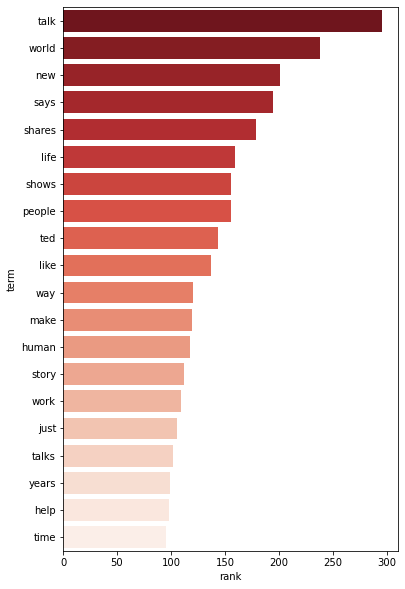

In [6]:
# Let's make a function to call the top ranked words in a vectorizer
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked

ranked = rank_words(terms=vectorizer.get_feature_names(), feature_matrix=tfidf)

fig, ax = plt.subplots(figsize=(6,10), ncols=1, nrows=1)
sns.barplot(x='rank',y='term',data=ranked[:20], palette='Reds_r', ax=ax);

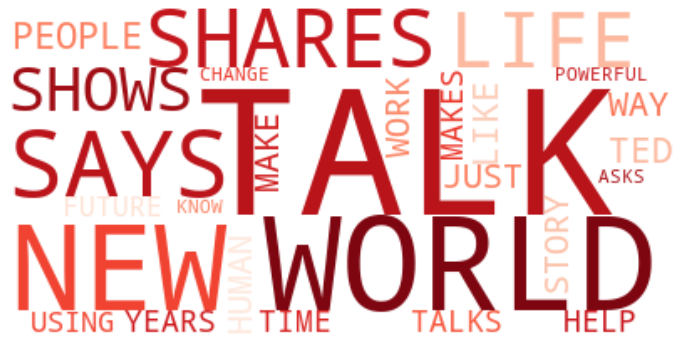

In [22]:
# Let's visualize a word cloud with the frequencies obtained by idf transformation
dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      colormap='Reds').generate_from_frequencies(dic)
fig = plt.figure(1,figsize=(12,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics,random_state=0)

topics = lda.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(lda.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['song', 'marriage', 'boys', 'feelings', 'silence'],
 1: ['song', 'marriage', 'boys', 'feelings', 'silence'],
 2: ['song', 'marriage', 'boys', 'feelings', 'silence'],
 3: ['song', 'marriage', 'boys', 'feelings', 'silence'],
 4: ['women', 'music', 'brain', 'kids', 'children'],
 5: ['song', 'marriage', 'boys', 'feelings', 'silence'],
 6: ['song', 'marriage', 'boys', 'feelings', 'silence'],
 7: ['song', 'marriage', 'boys', 'feelings', 'silence'],
 8: ['music', 'ends', 'starts', 'ca', 'welcome'],
 9: ['water', 'energy', 'cells', 'earth', 'planet']}

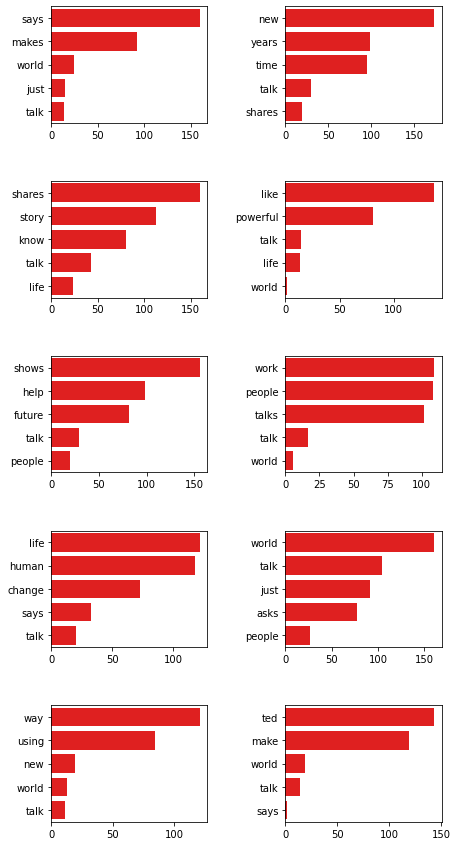

In [10]:
fig, ax = plt.subplots(figsize=(7,15), ncols=2, nrows=5)
plt.subplots_adjust(
    wspace  =  0.5,
    hspace  =  0.5
)
c=0
for row in range(0,5):
    for col in range(0,2):
        sns.barplot(x=word_strengths[c], y=t_words[c], color="red", ax=ax[row][col])
        c+=1
plt.show()

In [24]:
from sklearn.decomposition import NMF

n_topics = 10
nmf = NMF(n_components=n_topics,random_state=0)

topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

/Users/Administrator/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


{0: ['god', 'book', 'stories', 'oh', 'art'],
 1: ['women', 'men', 'girls', 'woman', 'sex'],
 2: ['music', 'play', 'sound', 'song', 'ends'],
 3: ['brain', 'brains', 'cells', 'body', 'activity'],
 4: ['water', 'earth', 'planet', 'ocean', 'species'],
 5: ['countries', 'africa', 'government', 'global', 'dollars'],
 6: ['cancer', 'cells', 'patients', 'disease', 'cell'],
 7: ['data', 'information', 'computer', 'machine', 'internet'],
 8: ['city', 'design', 'cities', 'building', 'buildings'],
 9: ['kids', 'children', 'education', 'students', 'teachers']}

In [31]:
ted_data['transcripts.transcript'].index
for x in ted_data['transcripts.transcript'].index:
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
# Formulating a pipeline to insert a document and extract the topics pertinency
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])


document_id = 4
t = pipe.transform([ted_data['transcripts.transcript'].iloc[document_id]]) 
print('Topic distribution for document #{}: \n'.format(document_id),t)
print('Relevant topics for document #{}: \n'.format(document_id),np.where(t>0.01)[1])
print('\nTranscript:\n',ted_data['transcripts.transcript'].iloc[document_id][:500],'...')
#talk = ted_main_df[ted_main_df['url']==transcripts_df['url'].iloc[document_id]]
#print('\nTrue tags from ted_main.csv: \n',talk['tags'])

Topic distribution for document #4: 
 [[0.         0.         0.         0.         0.         0.12614375
  0.         0.06512969 0.         0.04380911]]
Relevant topics for document #4: 
 [5 7 9]

Transcript:
 About 10 years ago, I took on the task to teach global development to Swedish undergraduate students. That was after having spent about 20 years together with African institutions studying hunger in Africa, so I was sort of expected to know a little about the world. And I started in our medical university, Karolinska Institute, an undergraduate course called Global Health. But when you get that opportunity, you get a little nervous. I thought, these students coming to us actually have the highes ...


In [33]:
for x in ted_data['transcripts.transcript'].index:
    t = pipe.transform([ted_data['transcripts.transcript'].iloc[x]]) 
    #print('Topic distribution for document #{}: \n'.format(document_id),t)
    print('Relevant topics for document #{}: \n'.format(x),np.where(t>0.01)[1])
#print('\nTranscript:\n',ted_data['transcripts.transcript'].iloc[document_id][:500],'...')

Relevant topics for document #0: 
 [0 1 2 3 4 9]
Relevant topics for document #1: 
 [0 4 5 8]
Relevant topics for document #2: 
 [0 2 5 7]
Relevant topics for document #3: 
 [1 4 5 8 9]
Relevant topics for document #4: 
 [5 7 9]
Relevant topics for document #5: 
 [0 3 5 6 7 9]
Relevant topics for document #6: 
 [0 1 9]
Relevant topics for document #7: 
 [0 7 8]
Relevant topics for document #8: 
 [0 2 3 4 7 8 9]
Relevant topics for document #9: 
 [0 5 9]
Relevant topics for document #10: 
 [1 5 6 7 8 9]
Relevant topics for document #11: 
 [0 1 2 5 9]
Relevant topics for document #12: 
 [0 1 5 6 9]
Relevant topics for document #13: 
 [7]
Relevant topics for document #14: 
 [0 5 7 9]
Relevant topics for document #15: 
 [0 2 7 8 9]
Relevant topics for document #16: 
 [0 2 7 8]
Relevant topics for document #17: 
 [1 4 5 6 7 8 9]
Relevant topics for document #18: 
 [0 4 7 8]
Relevant topics for document #19: 
 [0 5 7 8 9]
Relevant topics for document #20: 
 [0 2 5 7 8 9]
Relevant topics for 

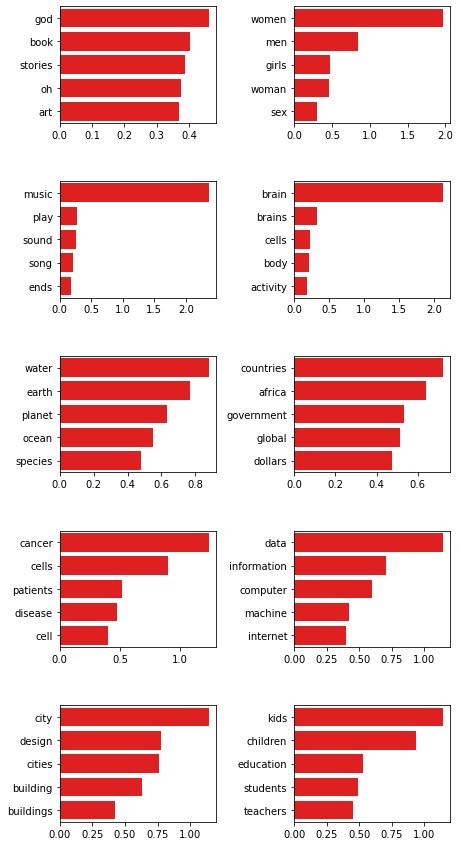

In [25]:
fig, ax = plt.subplots(figsize=(7,15), ncols=2, nrows=5)
plt.subplots_adjust(
    wspace  =  0.5,
    hspace  =  0.5
)
c=0
for row in range(0,5):
    for col in range(0,2):
        sns.barplot(x=word_strengths[c], y=t_words[c], color="red", ax=ax[row][col])
        c+=1
plt.show()

In [27]:
t = pipe.transform(ted_data['transcripts.transcript']) 
t = pd.DataFrame(t, columns=[str(t_words[i]) for i in range(0,10)])
t.head()

,"['god', 'book', 'stories', 'oh', 'art']","['women', 'men', 'girls', 'woman', 'sex']","['music', 'play', 'sound', 'song', 'ends']","['brain', 'brains', 'cells', 'body', 'activity']","['water', 'earth', 'planet', 'ocean', 'species']","['countries', 'africa', 'government', 'global', 'dollars']","['cancer', 'cells', 'patients', 'disease', 'cell']","['data', 'information', 'computer', 'machine', 'internet']","['city', 'design', 'cities', 'building', 'buildings']","['kids', 'children', 'education', 'students', 'teachers']"
0,0.052221,0.027318,0.032362,0.023086,0.014491,0.000000,0.000000,0.000000,0.000000,0.161931
1,0.032351,0.000000,0.000150,0.000000,0.035539,0.073795,0.000000,0.003728,0.039604,0.000000
2,0.069865,0.000000,0.037985,0.000000,0.000000,0.012010,0.000000,0.084761,0.008095,0.000000
3,0.008961,0.011324,0.000000,0.000000,0.021494,0.063281,0.001415,0.000000,0.153677,0.032108
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.126145,0.000000,0.065130,0.000000,0.043809


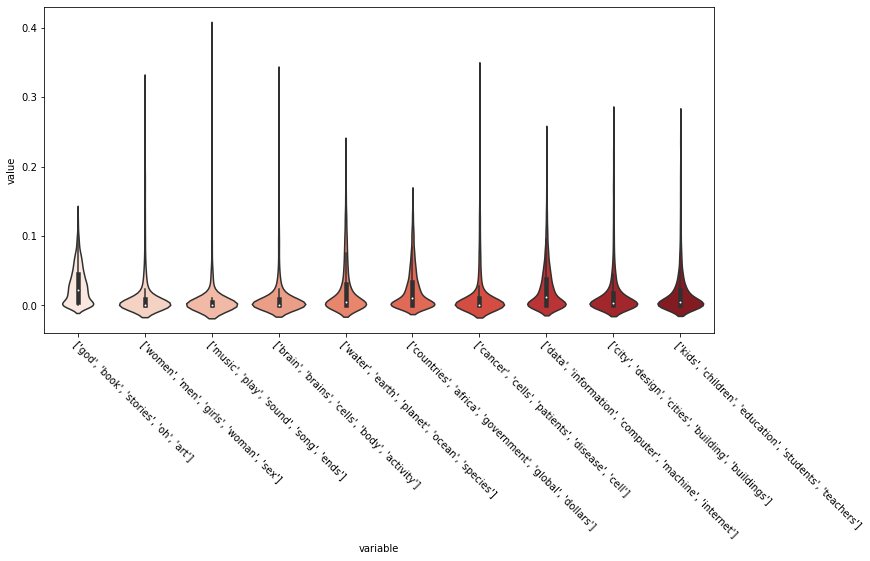

In [28]:
new_t = t.melt()

# fig = plt.figure(1,figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
sns.violinplot(x="variable", y="value", data=new_t, palette='Reds', ax=ax)
# plt.xticks(rotation=75)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 

plt.show()

# 0: god, 1:sex 2: music: 3:brain 4: earth 5: government 6: cancer 7: computer 8:city 9 education 
